In [1]:
import numpy as np
from scripts import dataset, scans, metrics

In [2]:
x_train, x_test = dataset.create_xtrain_xtest()
signal = dataset.load_dataset('BSM_preprocessed.h5', 'GluGluHToTauTau')

In [3]:
kwargs = {'ndim': 1, 'ntrees':100, 'scoring_metric':'depth', 'random_seed': 23123}
model_name = metrics.train_and_save_model(kwargs, x_train)
fpr, tpr, auc = metrics.predict_value(model=model_name, x_test=x_test, signal=signal)

[]

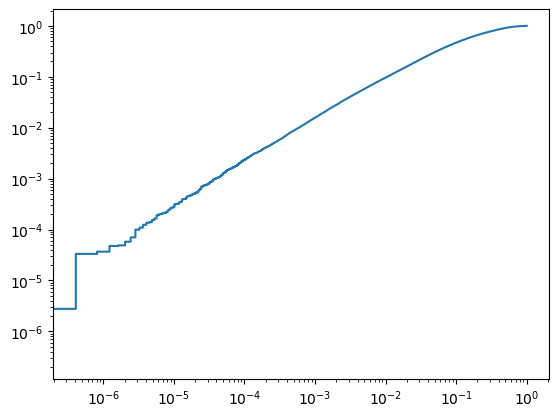

In [4]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.semilogx()
plt.semilogy()